In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from gensim import corpora, models
from gensim.models import CoherenceModel
from pprint import pprint

In [151]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()
CSV_PATH =os.getenv("CSV_PATH")

df=pd.read_csv(CSV_PATH)
df.dropna(subset=["Message"], inplace=True)
df = df[df["Auteur"] != "Inconnu"]
df.drop_duplicates(inplace=True)
df.head(30)

,Auteur,Message,Emoji,Date
0,Gonçalo (G),Le sondage « Who's already using #🤖ydata-sdk ?...,😥,25 mars 2025 à 21:08
1,@Bunny,"Hi, I've gathered a sort of an automation then...",NaN,26 mars 2025 à 00:32
2,@Gonçalo (G),what are you trying to solve with that?,NaN,26 mars 2025 à 10:00
3,@ᵏᵒᵈᵈʸ ♱,what does this mean,NaN,26 mars 2025 à 10:01
6,Gonçalo (G),if you can pull the issues from ydata-profilin...,😛,26 mars 2025 à 15:27
7,Bunny,lol thats a really nice idea actually,😁,26 mars 2025 à 17:44
9,@Bunny,Anyway there is a chance I'll pull ydata-profi...,🙂,Modification : 26 mars 2025 à 17:45
10,@Gonçalo (G),would love to be in the loop for that,🙂,27 mars 2025 à 13:54
11,@Bunny,Can I share here or with you the results of th...,NaN,Modification : 27 mars 2025 à 13:57
12,@Gonçalo (G),sure! post it on ⁠📊ydata-profiling,😁,27 mars 2025 à 14:07


In [153]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

def detect_lang(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Ajouter une colonne 'lang'
df["lang"] = df["Message"].apply(detect_lang)

# Garder uniquement les messages détectés comme anglais
df = df[df["lang"] == "en"]

In [207]:
custom_stopwords = {
    'im', 'ive', 'ya', 'hi', 'hello', 'everyone', 'guy', 'guys', 'd', 'would', 'like', 'one',
    'get', 'also', 'know', 'dont', 'let', 'us', 'want', 'need', 'use', 'using', 'question',
    'help', 'thank', 'thanks', 'thing', 'things', 'hey', 'still', 'well', 'maybe', 'look',
    'looking','anyone', 'someone', 'please', 'make', 'good', 'work', 'time', 'really', 'trying', 'interested',
      'youre', 'take', 'find', 'something','he','great','un', 'ce', 'dans','new','chaneel','talk','le', 'tous',
    'st','fine','frind','d',
 }

def clean_text(text):
    text = str(text).strip()
    text = " ".join(text.split())
    text=text.lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"@\w+", "", text) 
    text = re.sub(r"#\w+", "", text)      
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r"[^a-z\s]", "", text)
    stop_words = set(stopwords.words("english")).union(custom_stopwords)
    word_tokens = word_tokenize(text) 
    text = [word for word in word_tokens if word not in stop_words and len(word) > 1]
    if len(text) < 3:
        return ""
    lemmatizer = WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word) for word in text]         
    return " ".join(text)

df["cleaned"] = df["Message"].apply(clean_text)
df = df[df["cleaned"] != ""] 
df["Autclean"] = df["Auteur"].str.replace("@", "", regex=False)
df.shape
df.head(30)


C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3767353584.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Autclean"] = df["Auteur"].str.replace("@", "", regex=False)


,Auteur,Message,Emoji,Date,message_length,Date_clean,heure,cleaned,Autclean
0,Gonçalo (G),Le sondage « Who's already using #🤖ydata-sdk ?\n\nhttps://pypi.o… » de\nGonçalo (G)\nest clos.\n25/03/2025 21:08\nNot yet\nRéponse gagnante • 100%\nVoir le sondage,😥,25 mars 2025 à 21:08,26,2025-03-25 21:08:00,21.0,sondage who already ydatasdk de gonalo est clos yet rponse gagnante voir sondage,Gonçalo (G)
1,@Bunny,"Hi, I've gathered a sort of an automation then pulls Github issues from a public repository, process the data and sends it to an AI agent for analyze. So far I've been pulling Odoo and ERPNext issues. Is someone here interested to see results for such thing?",NaN,26 mars 2025 à 00:32,47,2025-03-26 00:32:00,0.0,gathered sort automation pull github issue public repository process data sends ai agent analyze far pulling odoo erpnext issue see result,Bunny
6,Gonçalo (G),"if you can pull the issues from ydata-profiling and have a coding agent creating pull requests to solve those issues, that would be great",😛,26 mars 2025 à 15:27,24,2025-03-26 15:27:00,15.0,pull issue ydataprofiling coding agent creating pull request solve issue,Gonçalo (G)
7,Bunny,lol thats a really nice idea actually,😁,26 mars 2025 à 17:44,7,2025-03-26 17:44:00,17.0,lol thats nice idea actually,Bunny
9,@Bunny,Anyway there is a chance I'll pull ydata-profiling issues and then analyze it in order to fix a thing or two,🙂,Modification : 26 mars 2025 à 17:45,21,NaT,NaN,anyway chance ill pull ydataprofiling issue analyze order fix two,Bunny
11,@Bunny,Can I share here or with you the results of the AI agent analyzation of y-data-profiling open issues?,NaN,Modification : 27 mars 2025 à 13:57,18,NaT,NaN,share result ai agent analyzation ydataprofiling open issue,Bunny
12,@Gonçalo (G),sure! post it on ⁠📊ydata-profiling,😁,27 mars 2025 à 14:07,5,2025-03-27 14:07:00,14.0,sure post ydataprofiling,Gonçalo (G)
14,W3ST,"Coolest chatgpt convo dat export hacks? 3…2…1 go!\n\nI’m thinking: Multi dimensional embeddings, temporal vector clustering, transformer based insight extraction, n-gram dialogue pattern mining\n\nJust spitballing…\n\nImpress me",NaN,29 mars 2025 à 04:09,28,2025-03-29 04:09:00,4.0,coolest chatgpt convo dat export hack go thinking multi dimensional embeddings temporal vector clustering transformer based insight extraction ngram dialogue pattern mining spitballing impress,W3ST
15,TheRock,"Hello everyone. For any of the professional data scientists here, i have a question.\nI am currently a 2nd year cs student and i am still looking for which field to specialize in and data science is one of my options. But when i decide to do a data science project all i did was use some prewritten functions to get some insights and the only thing i needed of them is to understand the statisical concept behind them. MY quesition is: Is this really all what data scienists do? I wanna know what else they do in their career and specialization",NaN,29 mars 2025 à 21:18,102,2025-03-29 21:18:00,21.0,professional data scientist currently nd year c student field specialize data science option decide data science project prewritten function insight needed understand statisical concept behind quesition data scienists wan na else career specialization,TheRock
16,@TheRock,"Hello everyone. For any of the professional data scientists here, i have a question. I am currently a 2nd year cs student and i am still looking for which field to specialize in and data science is one of my options. But when i decide to do a data science project all i did was use some prewritten functions to get some insights and the only thing i needed of them is to understand the statisical concept behind them. MY quesition is: Is this really all what data scienists do? I wanna know what else they do in their career and specialization",NaN,30 mars 2025 à 02:10,102,2025-03-30 02:10:00,2.0,professional data scientist currently nd year c student field specialize data science option decide data science project prewritten func

In [196]:
print(df[['Message', 'cleaned']].head(10))



                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Message  \
0                                                                                                                                                                                                                                                                                                                                                                                                Le sondage « Who's already using #🤖ydata-sdk ?\n\nhttps://pypi.

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3638347847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emoji_counts.head(10).index, y=emoji_counts.head(10).values, palette="crest")
c:\Users\hp\Documents\PFA_INE1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\Documents\PFA_INE1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\Documents\PFA_INE1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\Documents\P

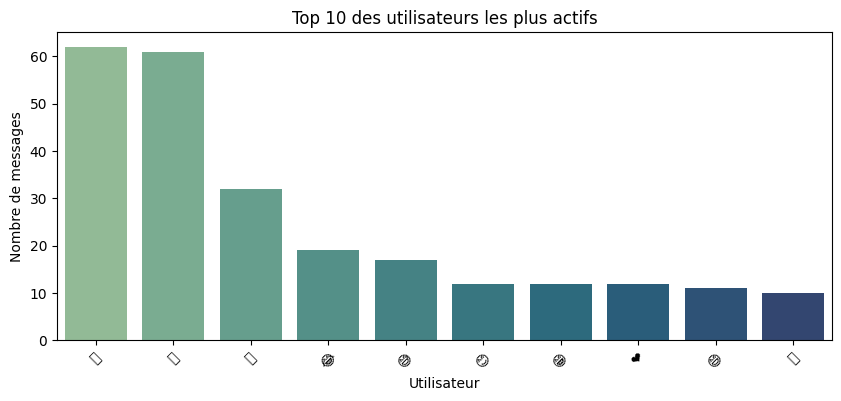

🔝 Emoji le plus utilisé : 🙂
Emoji
🙂     62
👋     61
👍     32
😂     19
😅     17
😊     12
😁     12
❤️    12
😄     11
👀     10
Name: count, dtype: int64


KeyError: 'Autclean'

In [ ]:
# 🕵️‍♂️ 1. Emoji le plus fréquent
emoji_counts = df['Emoji'].value_counts()
most_common_emoji = emoji_counts.idxmax()

print("🔝 Emoji le plus utilisé :", most_common_emoji)
print(emoji_counts.head(10))  # Top 10 emojis


# 👤 2. Utilisateurs les plus actifs
user_counts = df['Autclean'].value_counts()
most_active_user = user_counts.idxmax()

plt.figure(figsize=(10, 4))
sns.barplot(x=user_counts.head(10).index, y=user_counts.head(10).values, palette="crest")
plt.title("Top 10 des utilisateurs les plus actifs")
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de messages")
plt.xticks(rotation=45)
plt.show()
plt.savefig("Top 10 des utilisateurs les plus actifs")


C:\Users\hp\AppData\Local\Temp\ipykernel_13608\4065585570.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequence_par_heure.index, y=frequence_par_heure.values, palette="viridis")


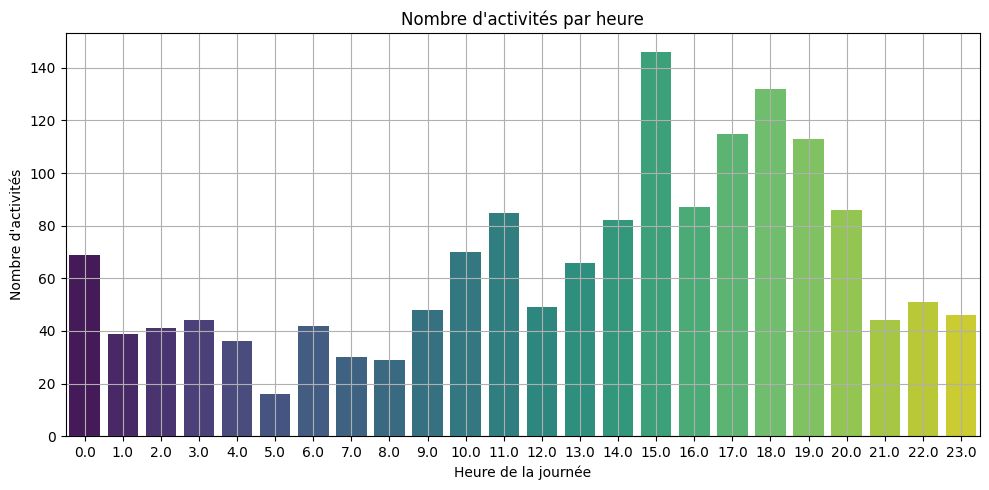

(1610, 7)

In [ ]:
import locale
locale.setlocale(locale.LC_TIME, 'French_France')

df["Date_clean"] = df["Date"].str.replace("à", "", regex=False).str.strip()

# Conversion en datetime
df["Date_clean"] = pd.to_datetime(df["Date_clean"], format="%d %B %Y %H:%M", errors="coerce")

# Extraire l'heure
df["heure"] = df["Date_clean"].dt.hour

# Compter les activités par heure
frequence_par_heure = df["heure"].value_counts().sort_index()

# Tracer
plt.figure(figsize=(10,5))
sns.barplot(x=frequence_par_heure.index, y=frequence_par_heure.values, palette="viridis")
plt.title("Nombre d'activités par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre d'activités")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.savefig("frequence_par_heure.png")
plt.show()


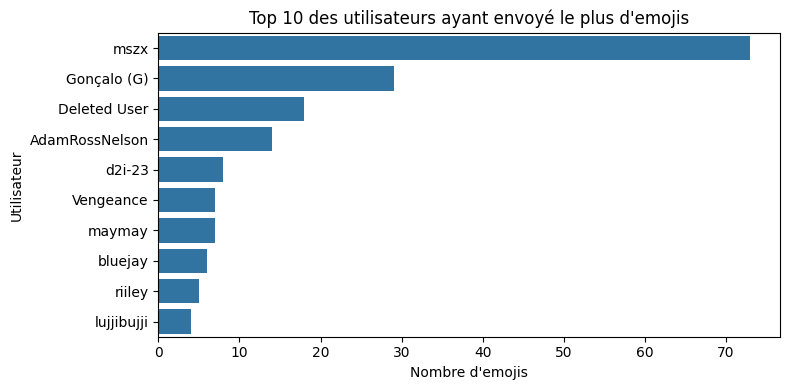

In [157]:
# 5. Usage d'emojis par utilisateur (top 10)
emoji_counts_by_user = (
    df[df['Emoji'].astype(bool)]
      .groupby('Autclean')['Emoji']
      .count()
      .sort_values(ascending=False)
      .head(10)
)
plt.figure(figsize=(8,4))
sns.barplot(x=emoji_counts_by_user.values, y=emoji_counts_by_user.index)
plt.title("Top 10 des utilisateurs ayant envoyé le plus d'emojis")
plt.xlabel("Nombre d'emojis")
plt.ylabel("Utilisateur")
plt.tight_layout()
plt.savefig("emoji_par_utilisateur.png", dpi=300, bbox_inches='tight')
plt.show()

[('data', 526), ('ai', 264), ('project', 174), ('model', 114), ('learning', 108), ('science', 93), ('people', 80), ('working', 66), ('python', 61), ('machine', 61), ('dataset', 58), ('image', 56), ('job', 54), ('research', 54), ('course', 52), ('way', 51), ('think', 50), ('question', 49), ('ml', 48), ('could', 48), ('best', 47), ('issue', 45), ('idea', 45), ('field', 45), ('modifi', 45), ('experience', 45), ('company', 45), ('tool', 45), ('learn', 44), ('problem', 44)]


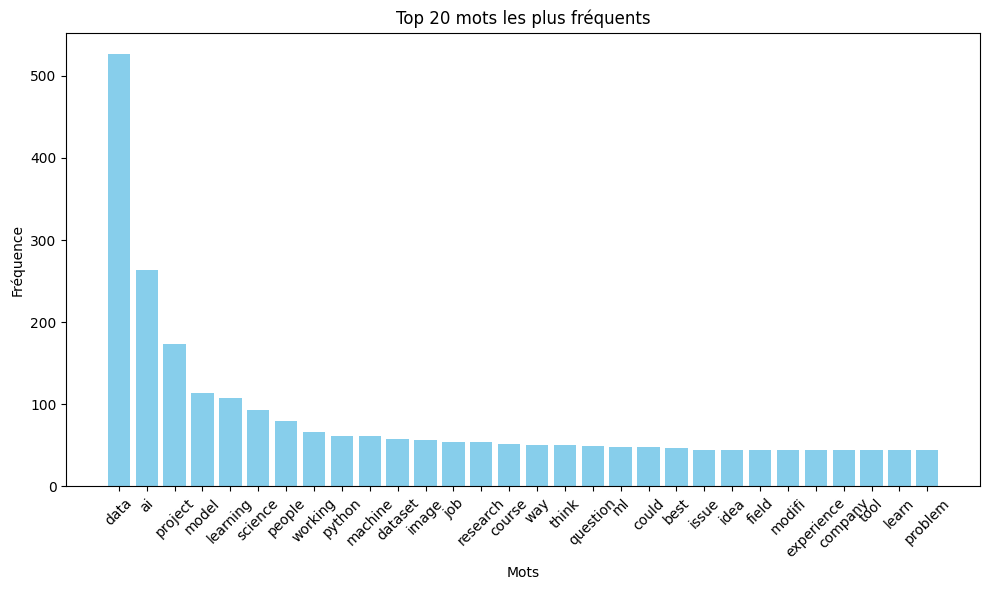

<Figure size 640x480 with 0 Axes>

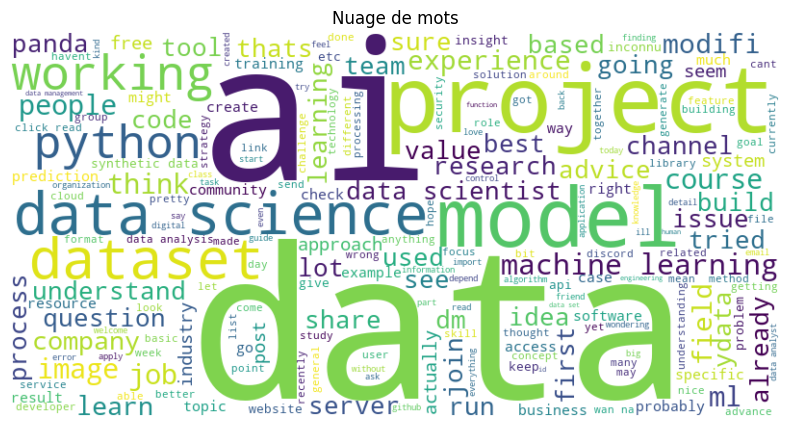

<Figure size 640x480 with 0 Axes>

In [158]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = []
for text in df["cleaned"]: 
    all_words.extend(text.split())

freq = Counter(all_words)

common_words = freq.most_common(30)
print(common_words)

# 4. Visualisation : barplot
plt.figure(figsize=(10, 6))
plt.bar([word for word, count in common_words], [count for word, count in common_words], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()
plt.savefig("Top 20 mots les plus fréquents")

#nuage des mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots")
plt.show()
plt.savefig("Nuage de mots")


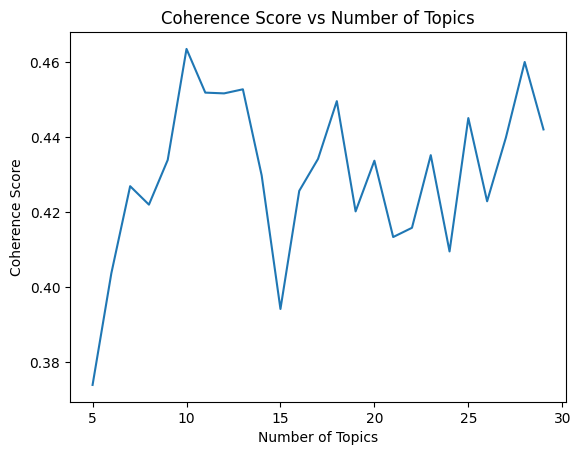

✅ Meilleur nombre de topics : 10 avec coherence = 0.4635
[(0,
  '0.077*"code" + 0.066*"server" + 0.057*"going" + 0.053*"team" + 0.052*"ml" + '
  '0.038*"practice" + 0.037*"collection" + 0.035*"tried" + 0.029*"probably" + '
  '0.026*"worked"'),
 (1,
  '0.081*"data" + 0.048*"synthetic" + 0.023*"tool" + 0.022*"web" + '
  '0.022*"pipeline" + 0.021*"various" + 0.019*"around" + 0.018*"generation" + '
  '0.018*"big" + 0.017*"including"'),
 (2,
  '0.037*"quality" + 0.034*"best" + 0.032*"learn" + 0.030*"nist" + '
  '0.026*"machine_learning" + 0.026*"check" + 0.025*"week" + 0.024*"share" + '
  '0.023*"library" + 0.023*"link"'),
 (3,
  '0.030*"development" + 0.028*"think" + 0.027*"see" + 0.027*"discord" + '
  '0.023*"put" + 0.022*"course" + 0.021*"handle" + 0.019*"tip" + 0.019*"way" + '
  '0.019*"nice"'),
 (4,
  '0.275*"data" + 0.126*"project" + 0.051*"science" + 0.033*"scientist" + '
  '0.031*"analysis" + 0.030*"currently" + 0.024*"field" + 0.021*"analyst" + '
  '0.019*"github" + 0.019*"create"'

<Figure size 640x480 with 0 Axes>

In [164]:
from gensim import models, corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, Phrases
from gensim.models.phrases import Phraser

# Tokenisation
texts = [text.split() for text in df["cleaned"]]

# Création de bigrammes
bigram = Phrases(texts, min_count=5, threshold=30)
bigram_mod = Phraser(bigram)
texts_bigram = [bigram_mod[doc] for doc in texts]

# Dictionnaire et corpus
id2word = corpora.Dictionary(texts_bigram)

id2word.filter_extremes(no_below=5, no_above=0.6)

corpus = [id2word.doc2bow(text) for text in texts_bigram]

# Fonction pour calculer la cohérence
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step): 
        model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                random_state=100,
                                update_every=1,
                                chunksize=100,
                                passes=10,
                                alpha='auto',
                                per_word_topics=False)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Tester plusieurs nombres de topics
start, limit, step = 5, 30, 1
model_list, coherence_values = compute_coherence_values(id2word, corpus, texts_bigram, start, limit, step)

# Tracer le score de cohérence
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()
plt.savefig("Coherence Score vs Number of Topics")

# Meilleur modèle
best_index = coherence_values.index(max(coherence_values))
best_model = model_list[best_index]
best_num_topics = start + best_index * step
print(f"✅ Meilleur nombre de topics : {best_num_topics} avec coherence = {coherence_values[best_index]:.4f}")

pprint(best_model.print_topics())


# Assigner les topics au DataFrame
df["topic"] = [max(best_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [160]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Préparer la visualisation
pyldavis_prepared = gensimvis.prepare(best_model, corpus, id2word)

# Afficher dans le notebook
pyLDAvis.display(pyldavis_prepared)

In [161]:
#sentiments
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
vaders = pd.DataFrame([sia.polarity_scores(text) for text in df['Message']])
df_with_sentiment = pd.concat([df.reset_index(drop=True), vaders], axis=1)
df_with_sentiment.head()

,Auteur,Message,Emoji,Date,lang,cleaned,Autclean,heure,topic,neg,neu,pos,compound
0,@Bunny,"Hi, I've gathered a sort of an automation then...",NaN,NaT,en,gathered sort automation pull github issue pub...,Bunny,NaN,10,0.0,0.942,0.058,0.4019
1,Gonçalo (G),if you can pull the issues from ydata-profilin...,😛,NaT,en,pull issue ydataprofiling coding agent creatin...,Gonçalo (G),NaN,10,0.0,0.712,0.288,0.7964
2,Bunny,lol thats a really nice idea actually,😁,NaT,en,lol thats nice idea actually,Bunny,NaN,1,0.0,0.404,0.596,0.7089
3,@Bunny,Anyway there is a chance I'll pull ydata-profi...,🙂,NaT,en,anyway chance ill pull ydataprofiling issue an...,Bunny,NaN,10,0.0,0.900,0.100,0.2500
4,@Bunny,Can I share here or with you the results of th...,NaN,NaT,en,share result ai agent analyzation ydataprofili...,Bunny,NaN,6,0.0,0.879,0.121,0.2960


C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3779787265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="topic", y="compound", data=df_with_sentiment, palette="viridis")


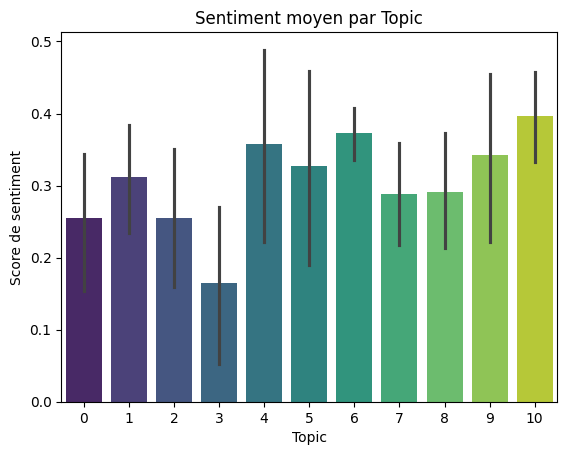

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3779787265.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="topic", y="compound", data=df_with_sentiment, palette="viridis")


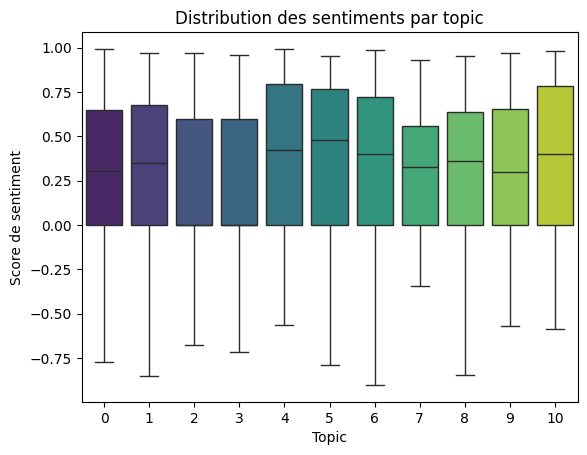

<Figure size 640x480 with 0 Axes>

In [165]:

sns.barplot(x="topic", y="compound", data=df_with_sentiment, palette="viridis")
plt.title("Sentiment moyen par Topic")
plt.xlabel("Topic")
plt.ylabel("Score de sentiment")
plt.show()
plt.savefig("Sentiment moyen par Topic")

sns.boxplot(x="topic", y="compound", data=df_with_sentiment, palette="viridis")
plt.title("Distribution des sentiments par topic")
plt.xlabel("Topic")
plt.ylabel("Score de sentiment")
plt.show()
plt.savefig("Distribution des sentiments par topic")